## Importing Datasets

In [317]:
import pandas as pd

# Load the datasets
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

# Display the first few rows of the train dataset
train_data.head()


,Feature1,Feature2,Feature3,Feature4,Label
0,26.303954,True,59.919036,126.853479,170.361411
1,19.646076,False,34.504636,108.363933,29.897337
2,36.983463,False,98.503396,5.085491,373.460027
3,36.516512,False,38.418101,1.173449,26.696336
4,28.734387,False,99.286184,29.123061,332.682539


In [318]:
# Display the first few rows of the test dataset
test_data.head()

,id,Feature1,Feature2,Feature3,Feature4
0,0,26.520753,False,2.276917,30.081571
1,1,19.260327,False,19.963927,32.540030
2,2,35.662216,False,114.665257,111.156286
3,3,17.693725,False,62.135788,11.251143
4,4,44.396224,False,167.567429,127.518999


In [319]:
train_info = train_data.info()
test_info = test_data.info()

# Getting basic statistics of the train and test datasets
train_description = train_data.describe()
test_description = test_data.describe()

train_info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Feature1  231 non-null    float64
 1   Feature2  240 non-null    bool   
 2   Feature3  240 non-null    float64
 3   Feature4  227 non-null    float64
 4   Label     240 non-null    float64
dtypes: bool(1), float64(4)
memory usage: 7.9 KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 60 entries, 0 to 59
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   id        60 non-null     int64  
 1   Feature1  60 non-null     float64
 2   Feature2  60 non-null     bool   
 3   Feature3  60 non-null     float64
 4   Feature4  60 non-null     float64
dtypes: bool(1), float64(3), int64(1)
memory usage: 2.1 KB


In [320]:
train_description

,Feature1,Feature3,Feature4,Label
count,231.000000,240.000000,227.000000,240.000000
mean,30.277218,69.706130,59.584543,308.476235
std,11.176810,187.923364,45.546105,464.394364
min,10.432014,-1129.060001,0.000000,-32.466802
25%,20.973077,23.892696,15.156651,28.887374
50%,29.870713,54.468361,53.978447,140.441039
75%,39.987688,91.713817,105.722662,373.604837
max,49.487028,1260.447274,127.999842,3253.238626


In [321]:
test_description

,id,Feature1,Feature3,Feature4
count,60.000000,60.000000,60.000000,60.000000
mean,29.500000,32.908396,72.118209,61.556373
std,17.464249,12.817690,68.389277,47.313160
min,0.000000,10.068714,-52.479628,0.091807
25%,14.750000,20.852594,20.942795,13.289005
50%,29.500000,35.030545,66.210279,57.250181
75%,44.250000,45.143474,117.966541,106.675199
max,59.000000,49.927176,245.595742,127.900427


## Handling Missing Values

In [322]:
# Filling missing values in 'Feature1' and 'Feature4' with their respective mean values
train_data['Feature1'].fillna(train_data['Feature1'].mean(), inplace=True)
train_data['Feature4'].fillna(train_data['Feature4'].mean(), inplace=True)

# Verifying if missing values are handled
missing_values_after_fill = train_data.isnull().sum()

missing_values_after_fill


Feature1    0
Feature2    0
Feature3    0
Feature4    0
Label       0
dtype: int64

In [323]:
train_data.shape

(240, 5)

## Handling Duplicates

In [324]:
#Handling Duplicates
train_data.drop_duplicates(inplace=True)
train_data.shape

(240, 5)

## Visualization

C:\Users\Hemant Gupta\AppData\Local\Temp\ipykernel_9776\1956722692.py:5: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn-darkgrid')
c:\Users\Hemant Gupta\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


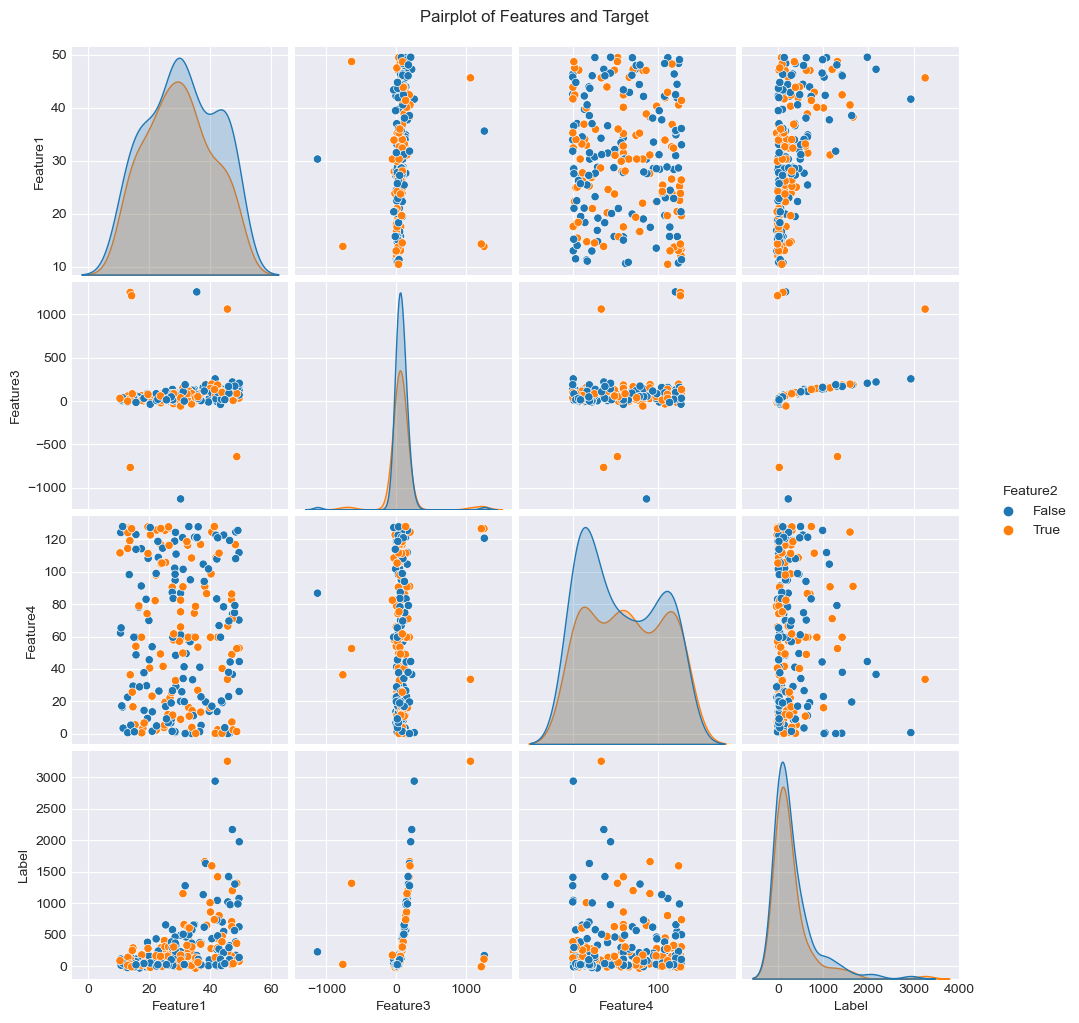

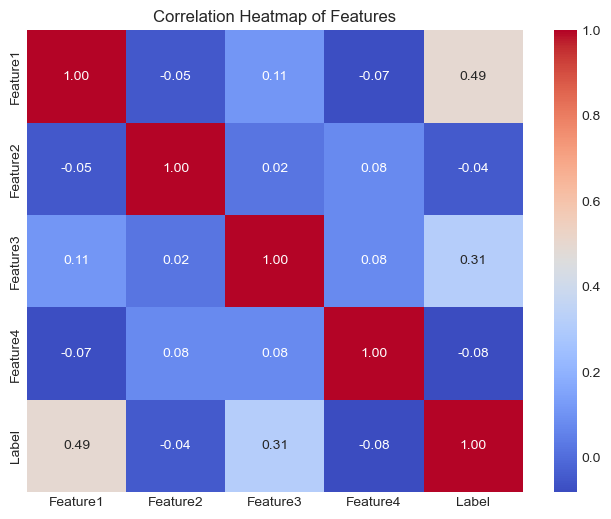

In [325]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the plotting style
plt.style.use('seaborn-darkgrid')

# Pairplot to visualize relationships between features and target (Label)
sns.pairplot(train_data, diag_kind='kde', hue='Feature2')
plt.suptitle('Pairplot of Features and Target', y=1.02)
plt.show()

# Correlation heatmap to see linear relationships
plt.figure(figsize=(8, 6))
correlation_matrix = train_data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Features')
plt.show()


## Making final predictions

In [326]:
import pandas as pd
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
import numpy as np

# Set the random seed for reproducibility
np.random.seed(42)

# Function to remove outliers using Z-score
def remove_outliers_zscore(X, y, threshold=3):
    # Calculate the Z-scores for each feature in X (distance from the mean in terms of standard deviations)
    z_scores = np.abs((X - X.mean()) / X.std())
    
    # Create a mask to filter out rows where all Z-scores are below the threshold (non-outliers)
    non_outlier_mask = (z_scores < threshold).all(axis=1)
    
    # Return only the rows of X and y that are not considered outliers
    return X[non_outlier_mask], y[non_outlier_mask]

# Extract the relevant features for training from the training data
X_train = train_data[['Feature1', 'Feature2', 'Feature3', 'Feature4']].copy()

# Convert the boolean feature 'Feature2' to an integer (0 or 1) for model compatibility
X_train['Feature2'] = X_train['Feature2'].astype(int)

# Extract the target/label column for training
y_train = train_data['Label']

# Remove outliers from the training data using the Z-score method
X_train_clean, y_train_clean = remove_outliers_zscore(X_train, y_train)

# Create a pipeline for scaling, polynomial feature transformation, and ridge regression
pipeline = Pipeline([
    ('scaler', StandardScaler()),        # Step 1: Scale features to have mean 0 and variance 1
    ('poly', PolynomialFeatures(degree=5, include_bias=False)),  # Step 2: Generate polynomial features up to degree 5, excluding the bias term
    ('ridge', Ridge())                   # Step 3: Apply Ridge regression (L2 regularization)
])

# Define a grid of hyperparameters for cross-validation tuning
param_grid = {
    'poly__degree': [2, 3, 4, 5, 6],        # Polynomial degrees to be tested: 2, 3, 4, 5, 6
    'ridge__alpha': [0.1, 1, 10, 100]    # Regularization strengths (alpha) to be tested for Ridge regression
}

# Use GridSearchCV to perform cross-validation with 10 folds and optimize for R² score
grid_search = GridSearchCV(pipeline, param_grid, cv=10, scoring='r2', n_jobs=-1)

# Fit the grid search on the cleaned training data (without outliers)
grid_search.fit(X_train_clean, y_train_clean)

# Output the best hyperparameters found during cross-validation
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Cross-Validation R² score: {grid_search.best_score_}")

# Retrieve the best model from the grid search
best_model = grid_search.best_estimator_

# Fit the best model on the entire cleaned training data
best_model.fit(X_train_clean, y_train_clean)

# Prepare the test data by extracting the same features and applying the same transformation (converting boolean to int)
X_test = test_data[['Feature1', 'Feature2', 'Feature3', 'Feature4']].copy()
X_test['Feature2'] = X_test['Feature2'].astype(int)

# Use the trained model to make predictions on the test data
test_predictions = best_model.predict(X_test)

# Create a DataFrame for the submission with 'id' and the predicted 'Label'
submission = pd.DataFrame({
    'id': test_data['id'],
    'Label': test_predictions
})

# Save the predictions to a CSV file for submission
submission.to_csv('submission.csv', index=False)
print("Submission file created.")


Best Parameters: {'poly__degree': 2, 'ridge__alpha': 0.1}
Best Cross-Validation R² score: 0.9735372417171366
Submission file created.
